## 1. Import Libraries

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Components
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Additional Libraries
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

### 1.1 Display all column in dataframe

In [2]:
# Set display limit columns in the dataframe to 40. To visualize all columns instead of "..." in between them
pd.set_option('display.max_columns', 40)

# set display limit columns in the dataframe to 100. To visualize all rows instead of "..." in between
pd.set_option('display.max_rows', 200)

## 2. Prepare database and Preprocessing

### 2.1 Load dataframe

In [3]:
# Load the dataset
file_path = '../raw_data/df_all_races.csv'

# file_path = '/home/mgasilva/code/diegonbotelho/f1-tire-prediction/raw_data/df_all_races.csv'
all_races_df = pd.read_csv(file_path)

### 2.2 Preprocess Dataframe

In [4]:
all_races_df.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Event_Year,GrandPrix,Delta_Lap
0,0 days 01:04:15.340000,VER,1,100.236,1.0,1.0,NaN,NaN,NaN,42.325,24.389,NaN,3831.046,3855.427,230.0,254.0,274.0,250.0,False,SOFT,...,False,Red Bull Racing,0 days 01:02:34.872000,2022-03-20 15:03:34.889,1,2.0,False,NaN,False,False,23.9,25.0,1010.2,False,29.1,20,0.5,2022,Bahrain,0.000
1,0 days 01:05:53.220000,VER,1,97.880,2.0,1.0,NaN,NaN,31.285,42.269,24.326,3886.662,3928.931,3953.257,NaN,252.0,276.0,296.0,True,SOFT,...,False,Red Bull Racing,0 days 01:04:15.340000,2022-03-20 15:05:15.357,1,2.0,False,NaN,False,True,23.8,26.0,1010.4,False,29.0,357,0.5,2022,Bahrain,-2.356
2,0 days 01:07:31.577000,VER,1,98.357,3.0,1.0,NaN,NaN,31.499,42.474,24.384,3984.756,4027.230,4051.614,229.0,254.0,276.0,294.0,False,SOFT,...,False,Red Bull Racing,0 days 01:05:53.220000,2022-03-20 15:06:53.237,1,2.0,False,NaN,False,True,23.8,27.0,1010.4,False,29.0,12,0.5,2022,Bahrain,0.477
3,0 days 01:09:10.143000,VER,1,98.566,4.0,1.0,NaN,NaN,31.342,42.674,24.550,4082.956,4125.630,4150.180,231.0,250.0,276.0,297.0,False,SOFT,...,False,Red Bull Racing,0 days 01:07:31.577000,2022-03-20 15:08:31.594,1,2.0,False,NaN,False,True,23.8,29.0,1010.4,False,28.7,12,0.4,2022,Bahrain,0.209
4,0 days 01:10:49.020000,VER,1,98.877,5.0,1.0,NaN,NaN,31.498,42.854,24.525,4181.678,4224.532,4249.057,229.0,256.0,276.0,293.0,False,SOFT,...,False,Red Bull Racing,0 days 01:09:10.143000,2022-03-20 15:10:10.160,1,2.0,False,NaN,False,True,23.8,33.0,1010.4,False,28.5,316,0.4,2022,Bahrain,0.311


In [5]:
# check each column type
all_races_df.dtypes

Time                   object
Driver                 object
DriverNumber            int64
LapTime               float64
LapNumber             float64
Stint                 float64
PitOutTime             object
PitInTime              object
Sector1Time           float64
Sector2Time           float64
Sector3Time           float64
Sector1SessionTime    float64
Sector2SessionTime    float64
Sector3SessionTime    float64
SpeedI1               float64
SpeedI2               float64
SpeedFL               float64
SpeedST               float64
IsPersonalBest         object
Compound               object
TyreLife              float64
FreshTyre                bool
Team                   object
LapStartTime           object
LapStartDate           object
TrackStatus             int64
Position              float64
Deleted                  bool
DeletedReason          object
FastF1Generated          bool
IsAccurate               bool
AirTemp               float64
Humidity              float64
Pressure  

In [6]:
# Display basic info
print("Dataset shape:", all_races_df.shape)

Dataset shape: (67079, 41)


In [7]:
# Remove first/last laps and pit stops
first_and_last_laps_in_stint_indexes = all_races_df[
    (all_races_df.PitInTime.notna()) |
    (all_races_df.PitOutTime.notna()) |
    (all_races_df.LapNumber == 1.0)].index
all_races_df.drop(first_and_last_laps_in_stint_indexes, inplace=True)

In [8]:
# Display basic info
print("Dataset shape:", all_races_df.shape)

Dataset shape: (61446, 41)


In [9]:
# Exclusion of features that are not necessary
drop_columns = [
    'Time', 'DriverNumber', 'PitOutTime', 'PitInTime', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
    'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest', 'FreshTyre', 'Team', 'LapStartTime', 'LapStartDate',
    'TrackStatus', 'Deleted', 'DeletedReason', 'FastF1Generated', 'IsAccurate', 'WindDirection', 'WindSpeed', 'Delta_Lap'
]

new_df = all_races_df.drop(columns=drop_columns, inplace=True)

In [10]:
# Missing Data Analysis
print("Missing data per column:")
print(all_races_df.isnull().sum())

Missing data per column:
Driver           0
LapTime        481
LapNumber        0
Stint            0
Sector1Time     92
Sector2Time     85
Sector3Time     82
Compound         0
TyreLife         0
Position        80
AirTemp          0
Humidity         0
Pressure         0
Rainfall         0
TrackTemp        0
Event_Year       0
GrandPrix        0
dtype: int64


In [11]:
# Display basic info
print("Dataset shape:", all_races_df.shape)

Dataset shape: (61446, 17)


In [12]:
# Drop nan in position column
all_races_df.dropna(subset=['Position'], inplace=True)

# Display basic info
print("Dataset shape:", all_races_df.shape)

Dataset shape: (61366, 17)


In [14]:
# Verify duplicates
print("Number of duplicates:", all_races_df.duplicated().sum())

Number of duplicates:
0


In [15]:
# checking once again if missing values in position column no longer exist
print("Missing data per column:")
print(all_races_df.isnull().sum())

Missing data per column:
Driver           0
LapTime        401
LapNumber        0
Stint            0
Sector1Time     12
Sector2Time      5
Sector3Time      2
Compound         0
TyreLife         0
Position         0
AirTemp          0
Humidity         0
Pressure         0
Rainfall         0
TrackTemp        0
Event_Year       0
GrandPrix        0
dtype: int64


In [16]:
# # Checking different values in each column
# for col in all_races:
#     print(all_races[col].unique())

# # ceeck different unique values in compound column
# print(all_races['Compound'].unique())

In [18]:
# Replace in the Rainfall column, False -> 0 and Ture -> 1
all_races_df.replace({'Rainfall': {False: 0, True: 1}}, inplace=True)

In [19]:
# Identify categorical and numerical columns
numerical_columns = all_races_df.select_dtypes(include=[np.number]).columns
categorical_columns = all_races_df.select_dtypes(include=object).columns

print(f'Numerical columns: \n {numerical_columns}')
print(f'Categorical columns: \n {categorical_columns}')

Numerical columns: 
 Index(['LapTime', 'LapNumber', 'Stint', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'TyreLife', 'Position', 'AirTemp', 'Humidity',
       'Pressure', 'Rainfall', 'TrackTemp', 'Event_Year'],
      dtype='object')
Categorical columns: 
 Index(['Driver', 'Compound', 'GrandPrix'], dtype='object')


### 2.3 Pre-visualization

In [20]:
# define a function to draw a histplot and boxplot graph
def graph(feature):
    # Set up the ppfigure and subplots
    plt.figure(figsize=(16, 6))  # Set the figure size (width, height)

    # Subplot 1: Histogram
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
    sns.histplot(all_races_df[feature], color='skyblue')  # Create a histogram with KDE
    plt.title(f'Histogram of {feature}', fontsize=16)  # Add a title
    plt.xlabel(f'{feature}', fontsize=14)  # Label the x-axis
    plt.ylabel('Frequency', fontsize=14)  # Label the y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

    # Subplot 2: Boxplot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
    sns.boxplot(x=all_races_df[feature], color='lightgreen')  # Create a boxplot
    plt.title(f'Boxplot of {feature}', fontsize=16)  # Add a title
    plt.xlabel(f'{feature}', fontsize=14)  # Label the x-axis
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability

    # Adjust layout and display the plot
    plt.tight_layout()  # Automatically adjust subplot spacing
    plt.show()

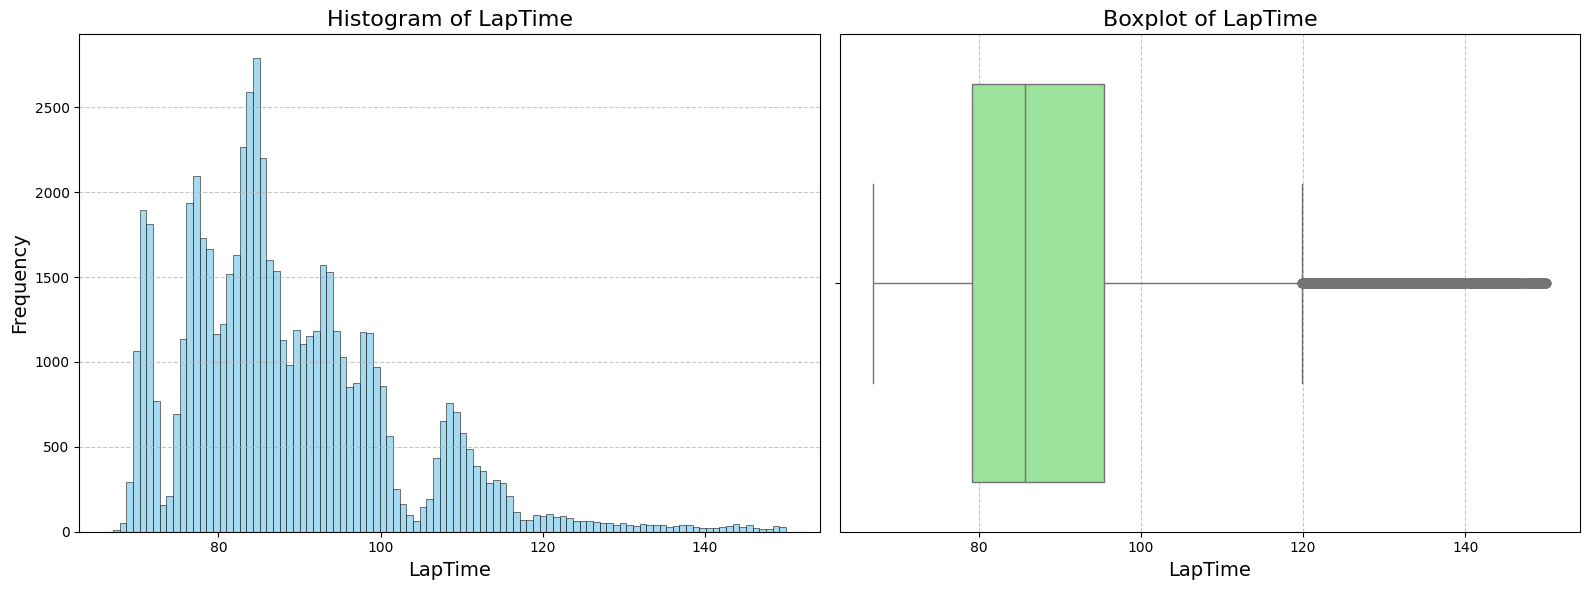

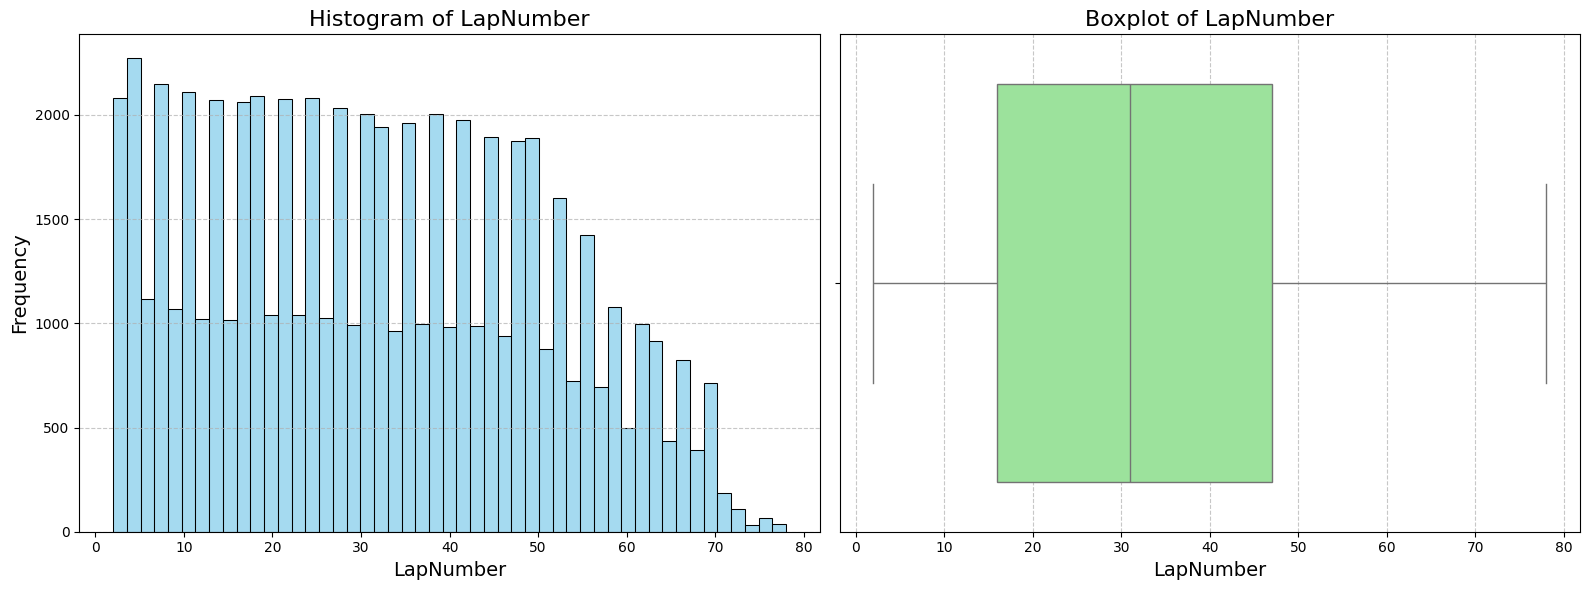

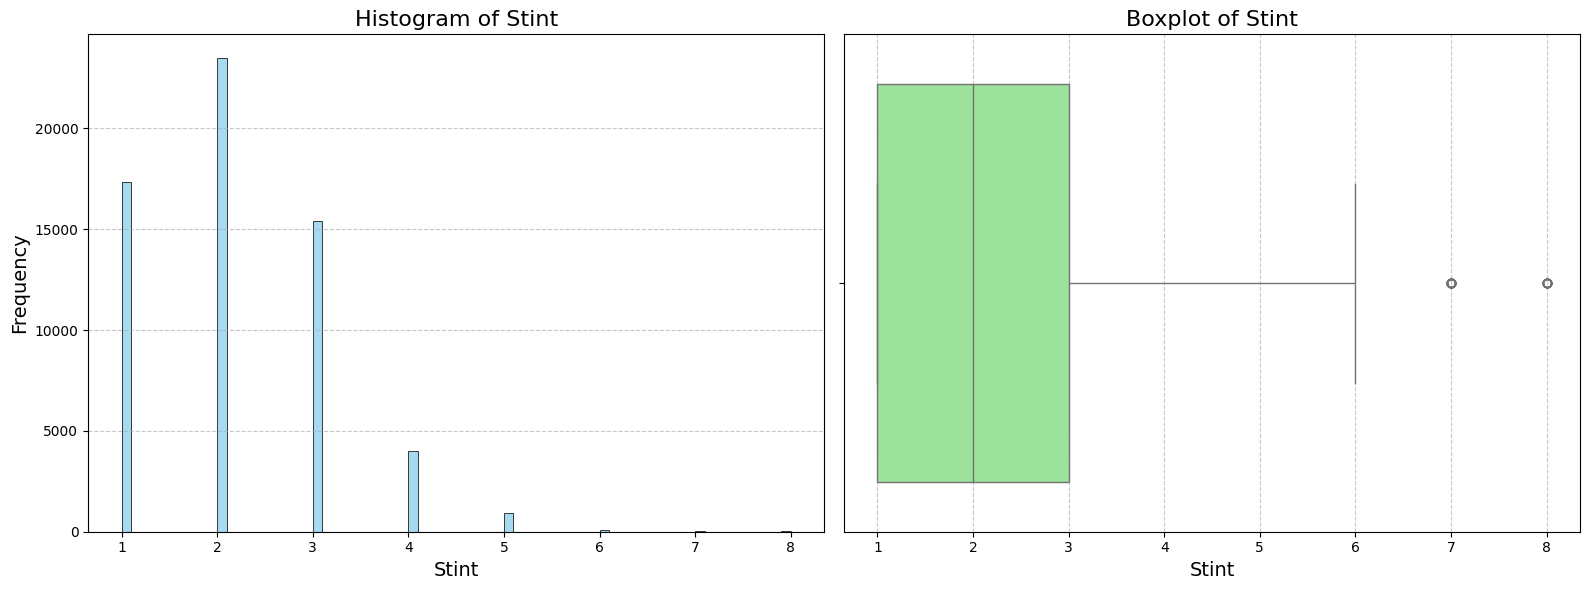

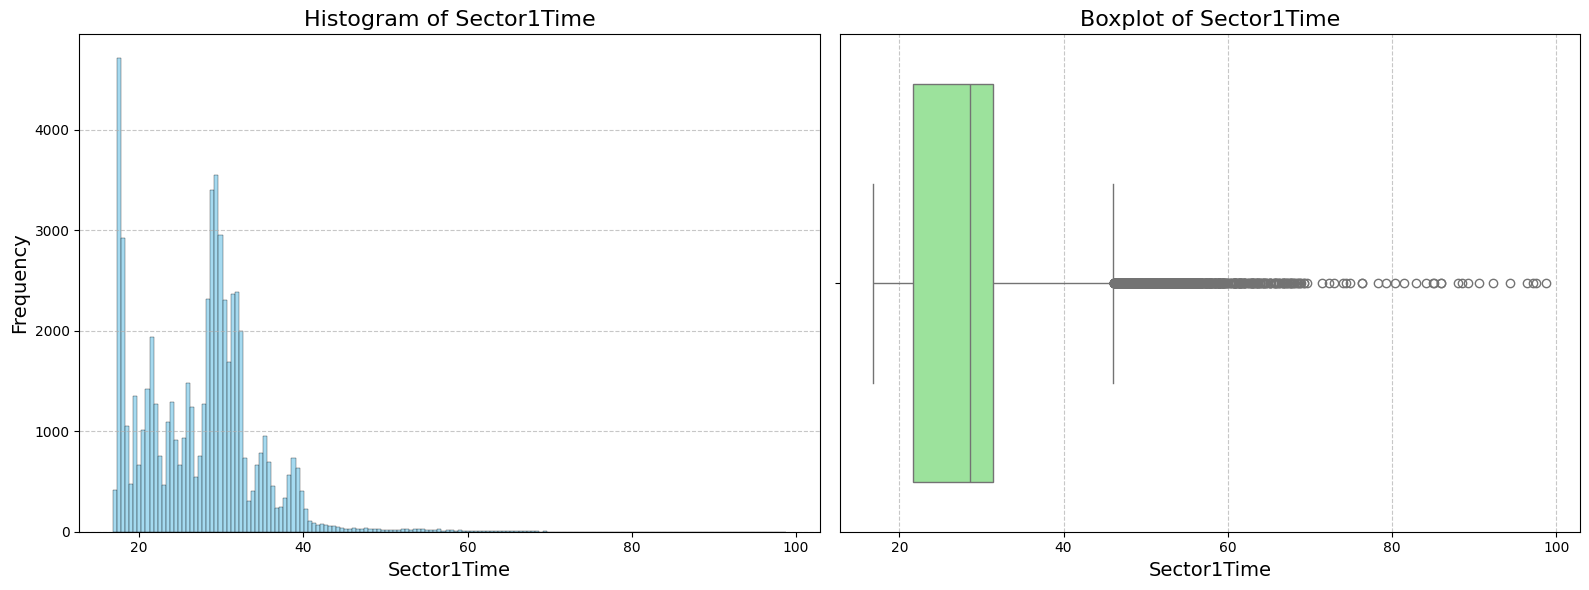

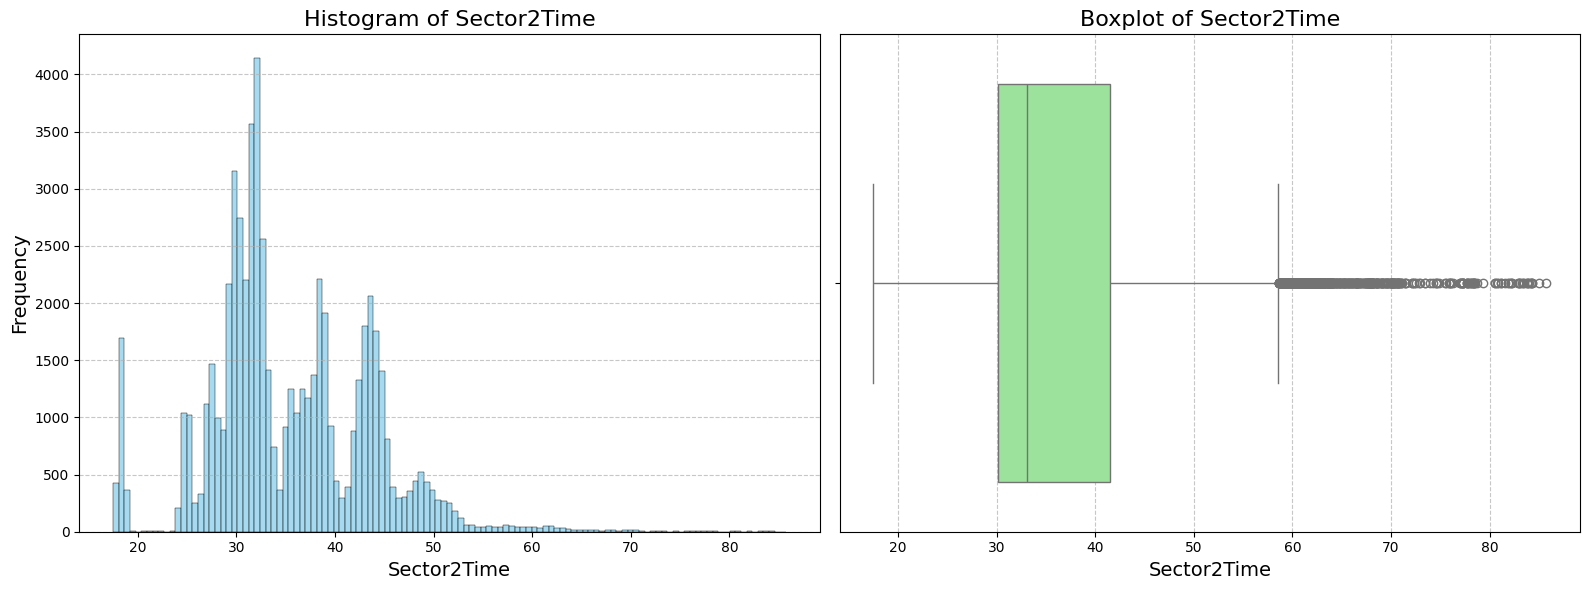

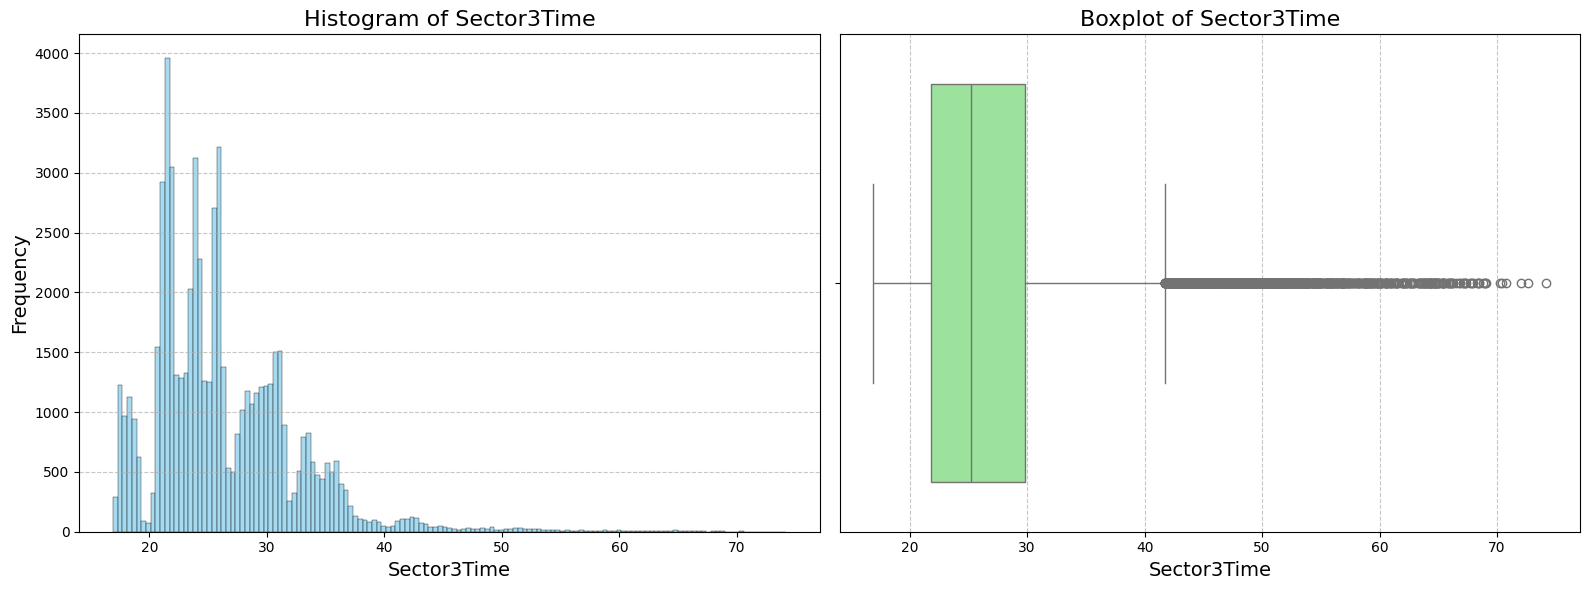

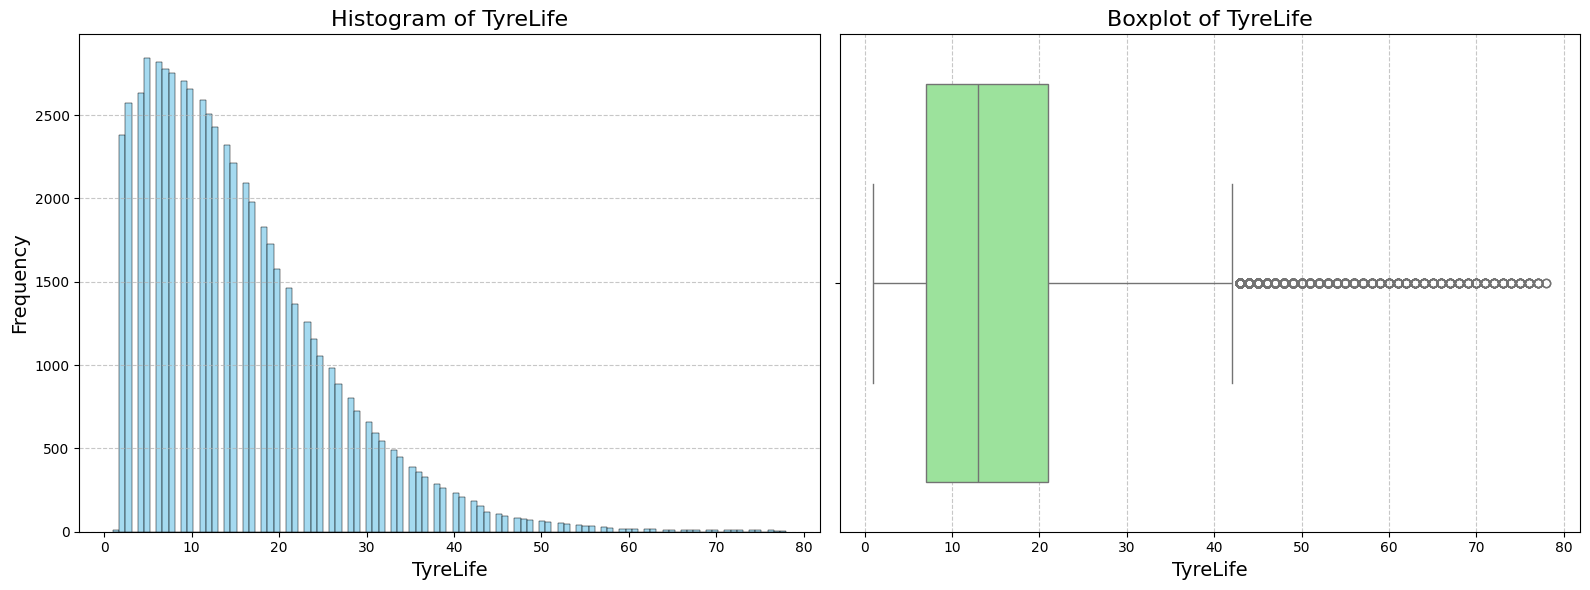

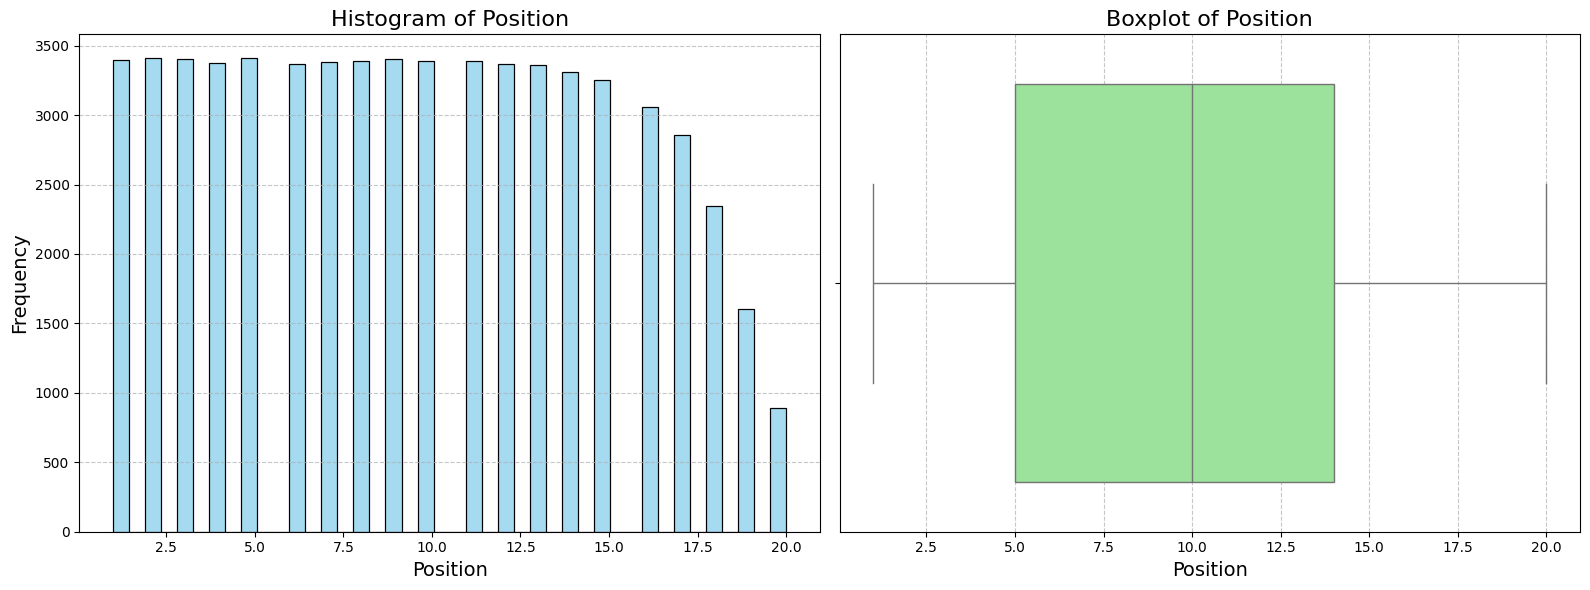

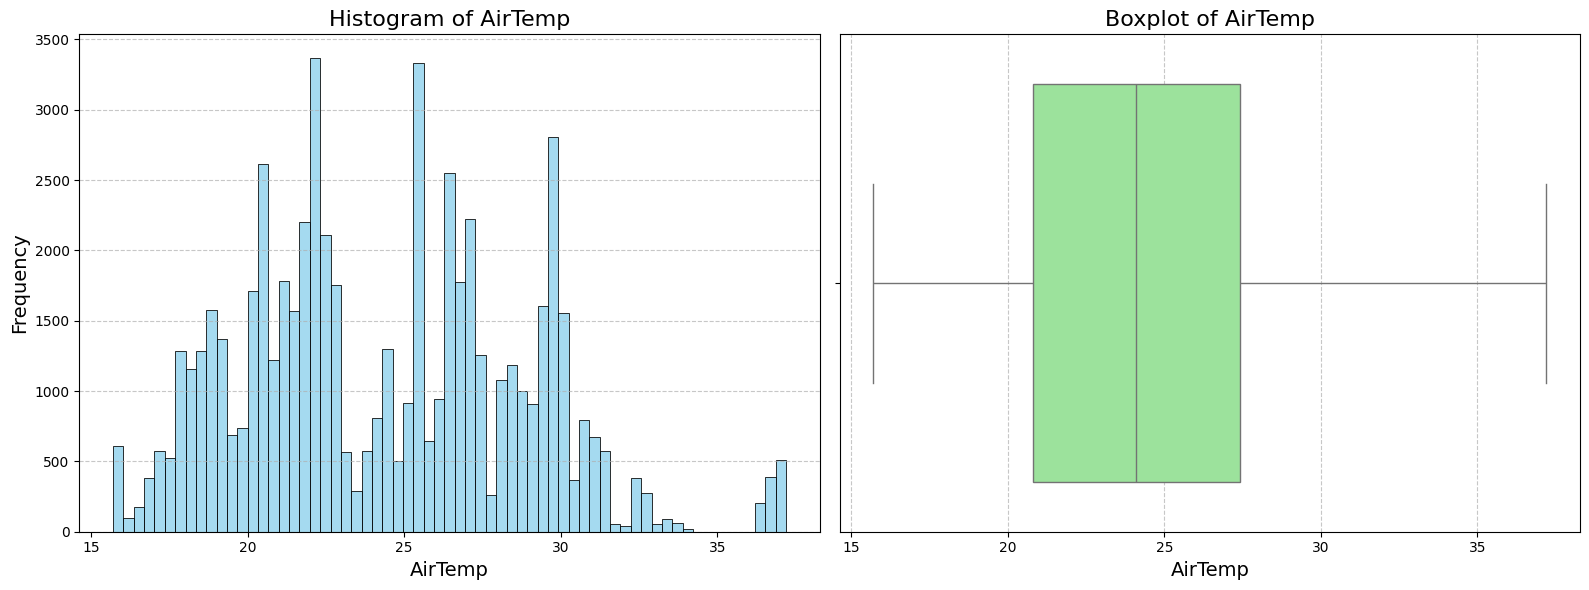

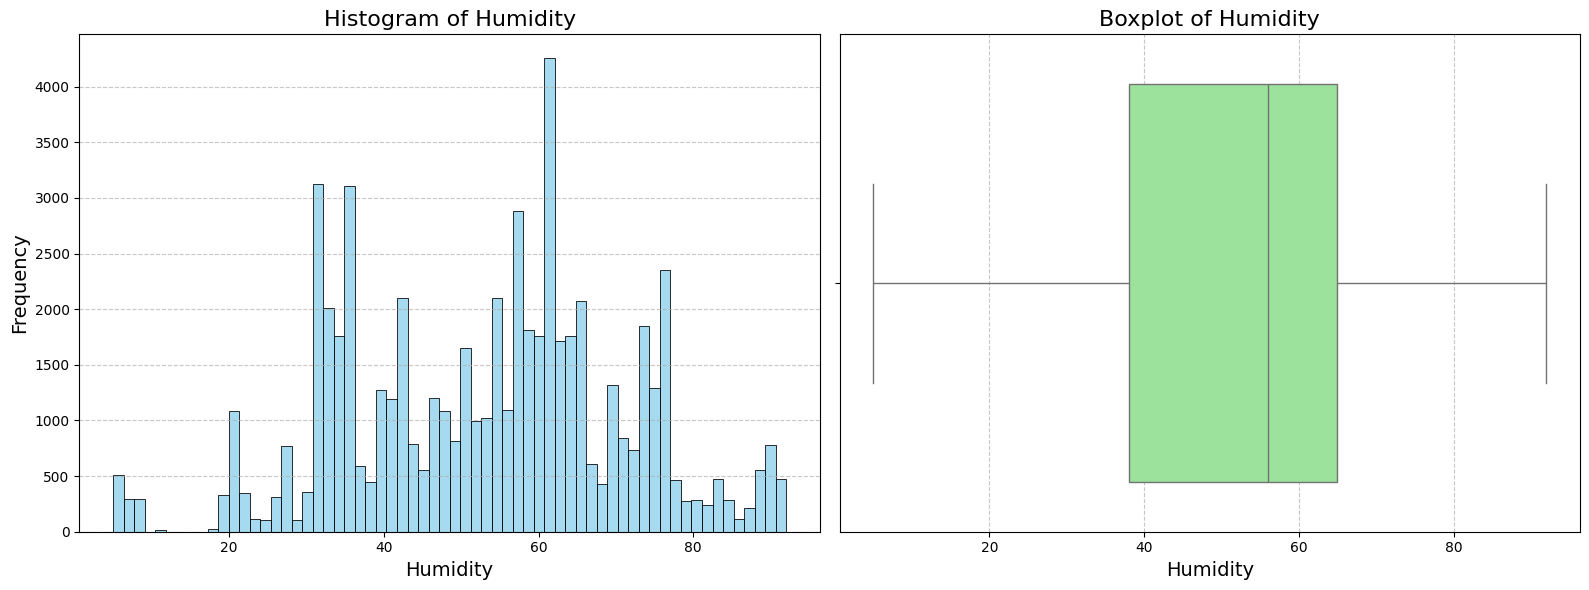

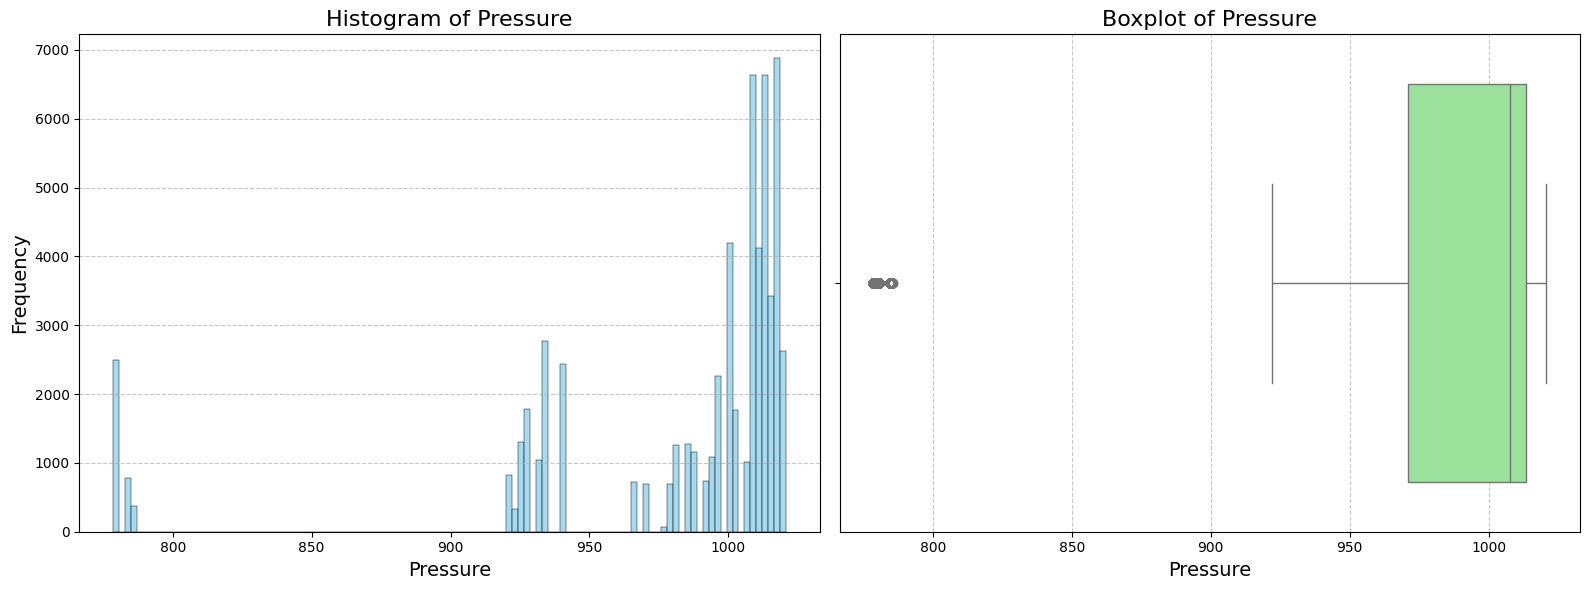

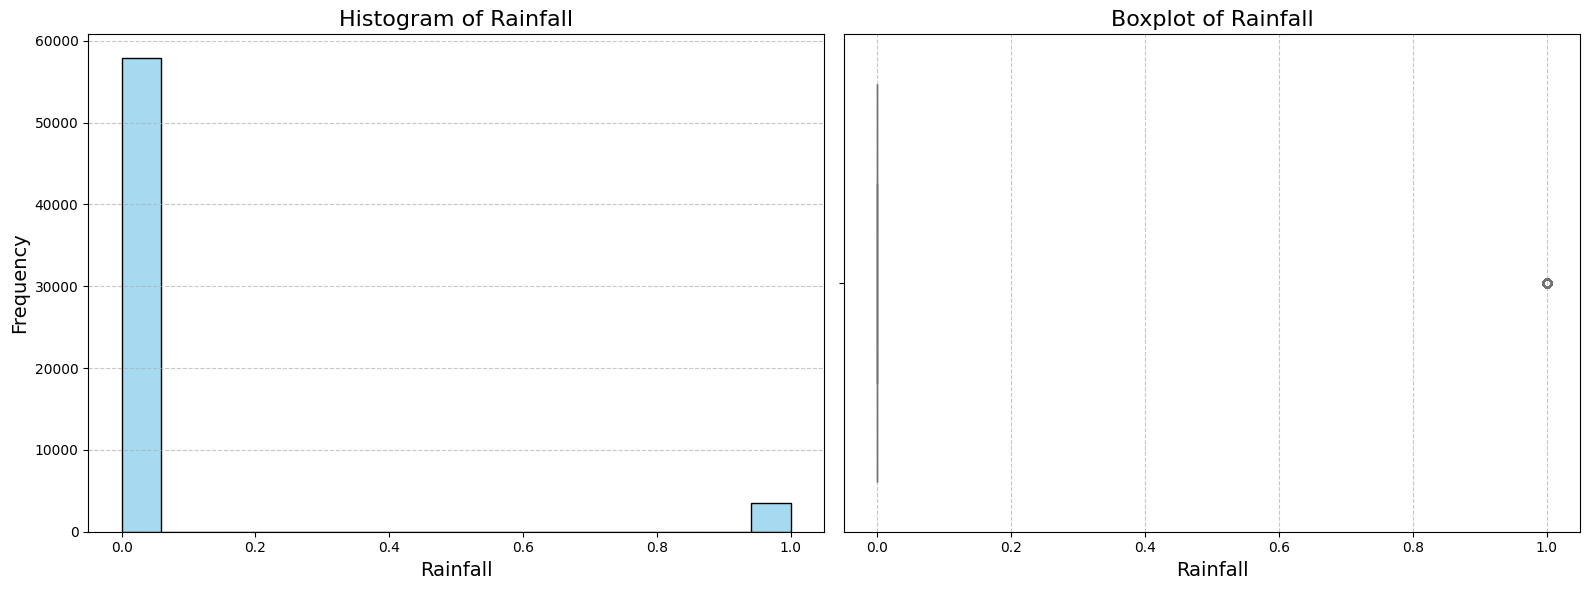

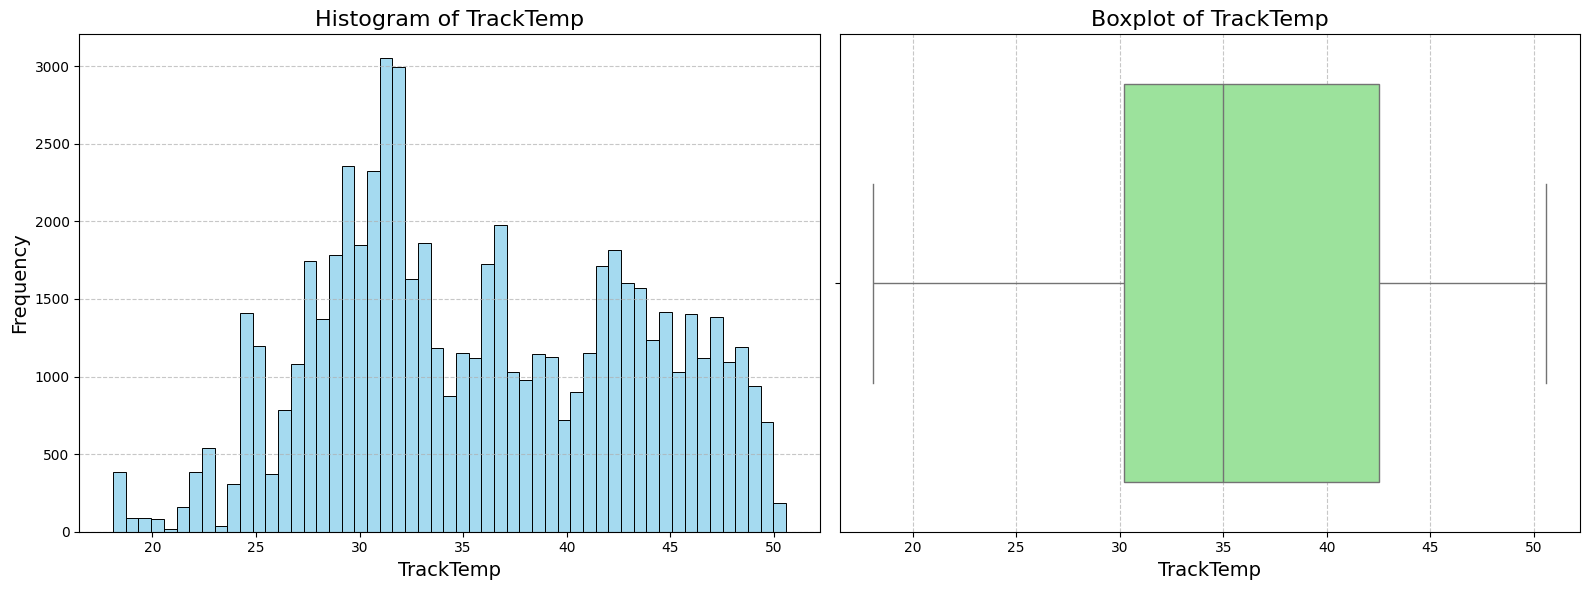

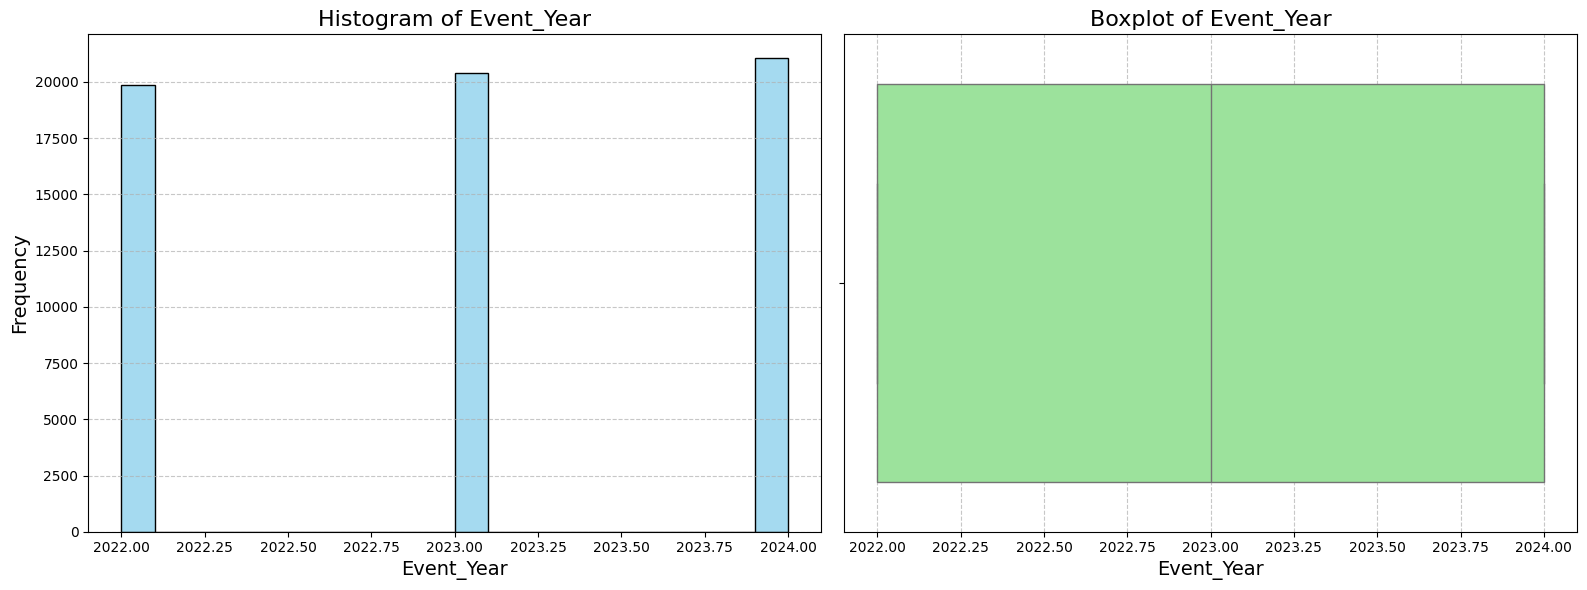

In [21]:
# for each of numerical features draw a histplot and boxplot graph using the function created above
for feature in numerical_columns:
    graph(feature)

## 3 Scale the features

In [22]:
all_races_df.describe()

,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,TyreLife,Position,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,Event_Year
count,60965.000000,61366.000000,61366.000000,61354.000000,61361.000000,61364.000000,61366.000000,61366.000000,61366.000000,61366.000000,61366.000000,61366.000000,61366.000000,61366.000000
mean,88.769984,31.844116,2.156683,27.504319,35.356586,26.370988,15.359271,9.630479,24.333996,53.193120,980.228812,0.056725,35.901250,2023.019213
std,13.296213,18.614636,0.980445,6.957396,8.098004,6.162938,10.658052,5.356057,4.434766,17.943173,58.368431,0.231319,7.488504,0.816680
min,67.012000,2.000000,1.000000,16.835000,17.488000,16.913000,1.000000,1.000000,15.700000,5.000000,778.500000,0.000000,18.100000,2022.000000
25%,79.183000,16.000000,1.000000,21.613000,30.138000,21.857750,7.000000,5.000000,20.800000,38.000000,971.000000,0.000000,30.200000,2022.000000
50%,85.719000,31.000000,2.000000,28.629000,33.063000,25.258000,13.000000,10.000000,24.100000,56.000000,1007.700000,0.000000,35.000000,2023.000000
75%,95.433000,47.000000,3.000000,31.403750,41.522000,29.812000,21.000000,14.000000,27.400000,65.000000,1013.400000,0.000000,42.500000,2024.000000
max,149.985000,78.000000,8.000000,98.794000,85.756000,74.193000,78.000000,20.000000,37.200000,92.000000,1020.800000,1.000000,50.600000,2024.000000


In [23]:
# Remove Outliers from LapTime
# define a function to exclude outliers before scaling it properly
def exclude_outliers(df, feature):
    """
    Exclude outliers from a feature in a DataFrame using the IQR method.
    """
    # Calculate Q1, Q3, and IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [24]:
# check datafram shape before removing outliers
all_races_df.shape

(61366, 17)

In [25]:
# remove outliers from LapTime column
all_races_df = exclude_outliers(all_races_df, 'LapTime')

# check daframe shape after outliers removed
all_races_df.shape

(59343, 17)

In [26]:
# Preprocess LapNumber as Percentage of the race completed
# First, calculate the max lap number for each unique GrandPrix/Event_Year combination
all_races_df['LapPct'] = all_races_df['LapNumber'] / all_races_df.groupby(['Event_Year', 'GrandPrix'])['LapNumber'].transform('max')

# Display a sample
# all_races_df[['Driver','LapNumber','LapPct','Event_Year','GrandPrix']].head()

,Driver,LapNumber,LapPct,Event_Year,GrandPrix
1,VER,2.0,0.035088,2022,Bahrain
2,VER,3.0,0.052632,2022,Bahrain
3,VER,4.0,0.070175,2022,Bahrain
4,VER,5.0,0.087719,2022,Bahrain
5,VER,6.0,0.105263,2022,Bahrain


In [27]:
# check missing values after dropping outliers
print("Missing data per column:")
print(all_races_df.isnull().sum())

Missing data per column:
Driver         0
LapTime        0
LapNumber      0
Stint          0
Sector1Time    2
Sector2Time    2
Sector3Time    0
Compound       0
TyreLife       0
Position       0
AirTemp        0
Humidity       0
Pressure       0
Rainfall       0
TrackTemp      0
Event_Year     0
GrandPrix      0
LapPct         0
dtype: int64


### 3.1 Building the Pipeline

In [28]:
# StandardScaler Pipeline for numerical features
num_transf_std = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standard_scaler', StandardScaler())
])

# MinMaxScaler Pipeline for numerical features
nun_transf_minmax = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('minmax_scaler', MinMaxScaler())
])

# RobustScaler Pipeline for numerical features
num_transf_robust = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('robust_scaler', RobustScaler())
])

# RobustScaler & MinMaxSacler Pipeline. Combination of these two methods
num_transf_combined = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('robust_scaler', RobustScaler()),
    ('minmax_scaler', MinMaxScaler())
])

# Categorical features Pipeline that will be encoded using OneHotEncoder
cat_transformer = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create a ColumnTransformer to apply OneHotEncoding and StandardScaler
numeric_preprocessor = ColumnTransformer(
    transformers=[
       #('num_std', num_transf_std, [numerical_columns]),              # StandardScale numerical features
        ('num_minmax', nun_transf_minmax, ['Position',
                                           'Stint',
                                           'TyreLife']),               # MinMaxScale numerical features
        ('num_robust', num_transf_robust, ['AirTemp',
                                           'TrackTemp',
                                           'Humidity',]),              # RobustScale numerical features
        ('num_combined', num_transf_combined, ['Pressure',
                                               'Sector1Time',
                                               'Sector2Time',
                                               'Sector3Time']),        # Combined two scalers 1° RobustScaler 2° MinMaxScaler
        ('cat', cat_transformer, ['Driver', 'GrandPrix', 'Compound']), # OneHotEncode categorical features
        ('passthrough_cols', 'passthrough', ['LapTime', 'LapPct'])     # passthrough means nothings will be done in these columns, it wil copy and paste to the output
    ],
    remainder='drop')                                                  # Columns in the original dataframe not mentioned in ColumnTransformer will be dropped

# Visualizing Pipelines
numeric_preprocessor

ColumnTransformer(transformers=[('num_minmax',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmax_scaler',
                                                  MinMaxScaler())]),
                                 ['Position', 'Stint', 'TyreLife']),
                                ('num_robust',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust_scaler',
                                                  RobustScaler())]),
                                 ['AirTemp', 'TrackTemp', 'Humidity']),
                                ('num_combined',
                                 Pipeline(step...mputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust_scaler',
                                                  RobustScaler()),
                                                 ('minmax_scaler',
                                                  MinMaxScaler())]),
                                 ['Pressure', 'Sector1Time', 'Sector2Time',
                                  'Sector3Time']),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Driver', 'GrandPrix', 'Compound']),
                                ('passthrough_cols', 'passthrough',
                                 ['LapTime', 'LapPct'])])

### 3.2 Fit & Transform

In [29]:
# fit & transform dataframe
fitted_all_races = numeric_preprocessor.fit_transform(all_races_df)

# check dataframe fitted & transformed
fitted_all_races = pd.DataFrame(fitted_all_races, columns=numeric_preprocessor.get_feature_names_out())

In [30]:
fitted_all_races.dtypes

num_minmax__Position            float64
num_minmax__Stint               float64
num_minmax__TyreLife            float64
num_robust__AirTemp             float64
num_robust__TrackTemp           float64
num_robust__Humidity            float64
num_combined__Pressure          float64
num_combined__Sector1Time       float64
num_combined__Sector2Time       float64
num_combined__Sector3Time       float64
cat__Driver_ALB                 float64
cat__Driver_ALO                 float64
cat__Driver_BEA                 float64
cat__Driver_BOT                 float64
cat__Driver_COL                 float64
cat__Driver_DEV                 float64
cat__Driver_DOO                 float64
cat__Driver_GAS                 float64
cat__Driver_HAM                 float64
cat__Driver_HUL                 float64
cat__Driver_LAT                 float64
cat__Driver_LAW                 float64
cat__Driver_LEC                 float64
cat__Driver_MAG                 float64
cat__Driver_MSC                 float64


In [31]:
fitted_all_races.describe()

,num_minmax__Position,num_minmax__Stint,num_minmax__TyreLife,num_robust__AirTemp,num_robust__TrackTemp,num_robust__Humidity,num_combined__Pressure,num_combined__Sector1Time,num_combined__Sector2Time,num_combined__Sector3Time,cat__Driver_ALB,cat__Driver_ALO,cat__Driver_BEA,cat__Driver_BOT,cat__Driver_COL,cat__Driver_DEV,cat__Driver_DOO,cat__Driver_GAS,cat__Driver_HAM,cat__Driver_HUL,...,cat__GrandPrix_Canada,cat__GrandPrix_Great Britain,cat__GrandPrix_Hungary,cat__GrandPrix_Italy,cat__GrandPrix_Japan,cat__GrandPrix_Mexico,cat__GrandPrix_Miami,cat__GrandPrix_Monaco,cat__GrandPrix_Netherlands,cat__GrandPrix_Saudi Arabia,cat__GrandPrix_Singapore,cat__GrandPrix_Spain,cat__GrandPrix_USA,cat__Compound_HARD,cat__Compound_INTERMEDIATE,cat__Compound_MEDIUM,cat__Compound_SOFT,cat__Compound_WET,passthrough_cols__LapTime,passthrough_cols__LapPct
count,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,...,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000,59343.000000
mean,0.455599,0.166646,0.189065,0.035121,0.067058,-0.081637,0.830707,0.236534,0.353898,0.215949,0.044133,0.051767,0.003640,0.051093,0.004887,0.009336,0.000893,0.051329,0.052525,0.034815,...,0.058322,0.046947,0.062181,0.044757,0.031545,0.059957,0.050301,0.061102,0.061861,0.039128,0.041117,0.059266,0.047015,0.462498,0.064860,0.346899,0.124025,0.001719,87.608881,0.512549
std,0.282329,0.139607,0.138574,0.664400,0.608260,0.658923,0.241784,0.142452,0.151406,0.124314,0.205393,0.221558,0.060222,0.220189,0.069736,0.096169,0.029872,0.220669,0.223085,0.183311,...,0.234353,0.211528,0.241486,0.206771,0.174788,0.237408,0.218567,0.239520,0.240904,0.193902,0.198562,0.236123,0.211672,0.498596,0.246281,0.475987,0.329613,0.041423,11.351288,0.283850
min,0.000000,0.000000,0.000000,-1.253731,-1.390244,-1.851852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.012000,0.025641
25%,0.210526,0.000000,0.077922,-0.492537,-0.398374,-0.666667,0.794057,0.108729,0.256730,0.118730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.983000,0.264888
50%,0.473684,0.142857,0.155844,0.000000,0.000000,0.000000,0.945109,0.270235,0.312876,0.194198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.410000,0.509434
75%,0.684211,0.285714,0.259740,0.507463,0.601626,0.333333,0.969459,0.333022,0.453497,0.302161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,94.540000,0.760000
max,1.000000,1.000000,1.000000,1.955224,1.252033,1.370370,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,119.805000,1.000000


### 3.3 Train & Test Split

In [ ]:
X = fitted_all_races.drop(columns=[
    'passthrough_cols__LapTime',
    'num_combined__Sector1Time',
    'num_combined__Sector2Time',
    'num_combined__Sector3Time'
])
y = fitted_all_races['passthrough_cols__LapTime']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
# # Initialize models
# models = {
#     "Linear Regression": LinearRegression(),
#     "Ridge": Ridge(),
#     "Lasso": Lasso(),
#     "Random Forest": RandomForestRegressor(random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(random_state=42),
#     "XGBoost": XGBRegressor(random_state=42),
#     "LightGBM": LGBMRegressor(random_state=42),
#     "SVR": SVR(),
#     "KNN": KNeighborsRegressor()
# }

# # Compare models function
# def compare_models(X_train, y_train, X_test, y_test, models):
#     """
#     Compare multiple regression models using cross-validation and test metrics
#     """
#     results = {}

#     for name, model in models.items():
#         cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2', verbose=0) # Training and cross-validation
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         metrics = {
#             'CV R² Mean': np.mean(cv_scores),
#             'CV R² Std': np.std(cv_scores),
#             'Test R²': r2_score(y_test, y_pred),
#             'MAE': mean_absolute_error(y_test, y_pred),
#             'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
#             'MAPE': np.mean(np.abs((y_test - y_pred) / y_test)) * 100
#         }

#         results[name] = metrics

#         print(f"\n{name}")
#         print(f"CV R²: {metrics['CV R² Mean']:.4f} (±{metrics['CV R² Std']:.4f})")
#         print(f"Test R²: {metrics['Test R²']:.4f}")
#         print(f"MAE: {metrics['MAE']:.4f}")

#     return pd.DataFrame(results).T.sort_values(by='Test R²', ascending=False)

# # Execute model comparison
# results_df = compare_models(X_train, y_train, X_test, y_test, models)

# # Gráfico de comparação
# plt.figure(figsize=(12, 6))
# results_df['Test R²'].sort_values().plot(kind='barh')
# plt.title('Comparação de Modelos por R² no Teste')
# plt.xlabel('R² Score')
# plt.show()

In [34]:
# # Train final model
# rf = RandomForestRegressor(random_state=42)
# rf.fit(X_train, y_train)

# # Evaluation function
# def evaluate_model(y_true, y_pred, model_name=""):
#     metrics = {
#         'R²': r2_score(y_true, y_pred),
#         'MAE': mean_absolute_error(y_true, y_pred),
#         'RMSE': np.sqrt(mean_squared_error(y_true, y_pred))
#     }
#     print(f"\nModel evaluation {model_name}:")
#     for name, value in metrics.items():
#         print(f"{name}: {value:.4f}")

#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(x=y_true, y=y_pred, alpha=0.4)
#     plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--r')
#     plt.xlabel('Real values')
#     plt.ylabel('Predicted Values')
#     plt.title(f'Real vs Predicted - {model_name}')
#     plt.show()

#     return metrics

# # Evaluate
# y_pred = rf.predict(X_test)
# metrics = evaluate_model(y_test, y_pred, "Random Forest")

In [35]:
# # Sample prediction
# new = X.iloc[[0]].copy()
# prediction = rf.predict(new)
# print(f"Predicted lap time: {prediction[0]:.2f} seconds")

## 5. Race Simulation (Driver, Year, Circuit)

In [36]:
# def plot_race_performance(driver, year, grand_prix, df=all_races_df, model=rf, preprocessor=numeric_preprocessor):
#     """
#     Plots lap time evolution with stint information for any driver, year, and circuit.

#     Parameters:
#     -----------
#     driver : str (e.g., 'HAM', 'VER')
#     year : int (e.g., 2023)
#     grand_prix : str (e.g., 'Great Britain')
#     df : DataFrame (default: all_races_df)
#     model : Trained model (default: rf_model)
#     preprocessor : Preprocessing pipeline (default: numeric_preprocessor)
#     """
#     # Filter data
#     race_data = df[
#         (df['Driver'] == driver) &
#         (df['Event_Year'] == year) &
#         (df['GrandPrix'] == grand_prix)
#     ].copy()

#     if race_data.empty:
#         raise ValueError(f"No data found for {driver} at {grand_prix} {year}")

#     # Prepare features and predict
#     features = preprocessor.transform(race_data)
#     features_df = pd.DataFrame(
#         features,
#         columns=preprocessor.get_feature_names_out()
#     )
#     X_race = features_df.drop(columns=[
#         'passthrough_cols__LapTime',
#         'num_combined__Sector1Time',
#         'num_combined__Sector2Time',
#         'num_combined__Sector3Time'
#     ])
#     race_data['PredictedLapTime'] = model.predict(X_race)

#     # Plot
#     fig, ax1 = plt.subplots(figsize=(14, 7))

#     # Primary Axis: Lap Times
#     ax1.plot(
#         race_data['LapNumber'],
#         race_data['LapTime'],
#         label='Actual Lap Time (s)',
#         marker='o',
#         color='blue',
#         linestyle='-',
#         linewidth=2
#     )
#     ax1.plot(
#         race_data['LapNumber'],
#         race_data['PredictedLapTime'],
#         label='Predicted Lap Time (s)',
#         marker='x',
#         color='red',
#         linestyle='--',
#         linewidth=2
#     )
#     ax1.set_xlabel('Lap Number', fontsize=12)
#     ax1.set_ylabel('Lap Time (seconds)', fontsize=12)
#     ax1.grid(True, linestyle='--', alpha=0.7)
#     ax1.legend(loc='upper left')

#     # Secondary Axis: Stints
#     ax2 = ax1.twinx()
#     ax2.plot(
#         race_data['LapNumber'],
#         race_data['Stint'],
#         label='Stint (Pit Stop)',
#         marker='s',
#         color='green',
#         linestyle=':',
#         linewidth=2
#     )
#     ax2.set_ylabel('Stint Number', fontsize=12)
#     ax2.legend(loc='upper right')

#     # Highlight pit stops (stint changes)
#     for i in range(1, len(race_data)):
#         if race_data['Stint'].iloc[i] != race_data['Stint'].iloc[i-1]:
#             ax1.axvline(
#                 x=race_data['LapNumber'].iloc[i],
#                 color='black',
#                 linestyle=':',
#                 alpha=0.5,
#                 label='Pit Stop' if i == 1 else ""
#             )

#     plt.title(f"Lap Time Evolution: {driver} at {grand_prix} {year}\n(Actual vs. Predicted)", fontsize=14)
#     fig.tight_layout()
#     plt.show()

# # Example 1: Hamilton at Bahrain 2024
# plot_race_performance(driver='HAM', year=2024, grand_prix='Great Britain')

# # Example 2: Verstappen at Bahrain 2024
# plot_race_performance(driver='VER', year=2024, grand_prix='Great Britain')

# # Example 3: Leclerc at Bahrain 2024
# plot_race_performance(driver='LEC', year=2024, grand_prix='Great Britain')

In [37]:
# StandardScaler Pipeline for numerical features
num_transf_std = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standard_scaler', StandardScaler())
])

# MinMaxScaler Pipeline for numerical features
nun_transf_minmax = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('minmax_scaler', MinMaxScaler())
])

# RobustScaler Pipeline for numerical features
num_transf_robust = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('robust_scaler', RobustScaler())
])

# RobustScaler & MinMaxSacler Pipeline. Combination of these two methods
num_transf_combined = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('robust_scaler', RobustScaler()),
    ('minmax_scaler', MinMaxScaler())
])

# Categorical features Pipeline that will be encoded using OneHotEncoder
cat_transformer = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create a ColumnTransformer to apply OneHotEncoding and StandardScaler
numeric_preprocessor = ColumnTransformer(
    transformers=[
       #('num_std', num_transf_std, [numerical_columns]),              # StandardScale numerical features
        ('num_minmax', nun_transf_minmax, ['Position',
                                           'Stint',
                                           'TyreLife']),               # MinMaxScale numerical features
        ('num_robust', num_transf_robust, ['AirTemp',
                                           'TrackTemp',
                                           'Humidity',]),              # RobustScale numerical features
        ('num_combined', num_transf_combined, ['Pressure',
                                               ]),        # Combined two scalers 1° RobustScaler 2° MinMaxScaler
        ('cat', cat_transformer, ['Driver', 'GrandPrix', 'Compound']), # OneHotEncode categorical features
    ],
    remainder='drop')                                                  # Columns in the original dataframe not mentioned in ColumnTransformer will be dropped

# Visualizing Pipelines
numeric_preprocessor

ColumnTransformer(transformers=[('num_minmax',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmax_scaler',
                                                  MinMaxScaler())]),
                                 ['Position', 'Stint', 'TyreLife']),
                                ('num_robust',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust_scaler',
                                                  RobustScaler())]),
                                 ['AirTemp', 'TrackTemp', 'Humidity']),
                                ('num_combined',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust_scaler',
                                                  RobustScaler()),
                                                 ('minmax_scaler',
                                                  MinMaxScaler())]),
                                 ['Pressure']),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Driver', 'GrandPrix', 'Compound'])])

In [38]:
final_pipeline = Pipeline([
    ('preprocessor', numeric_preprocessor),
    ('model_predict', RandomForestRegressor())
])
final_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_minmax',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Position', 'Stint',
                                                   'TyreLife']),
                                                 ('num_robust',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['AirTemp', 'TrackTemp',
                                                   'Humidity']),
                                                 ('num_combined',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robust_scaler',
                                                                   RobustScaler()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Pressure']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Driver', 'GrandPrix',
                                                   'Compound'])])),
                ('model_predict', RandomForestRegressor())])

In [39]:
X_pipeline = all_races_df.drop(columns=['Sector1Time', 'Sector2Time', 'Sector3Time','LapPct', 'LapTime'])
y_laptime = all_races_df['LapTime']

In [40]:
X_pipeline.iloc[:1,:]

,Driver,LapNumber,Stint,Compound,TyreLife,Position,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,Event_Year,GrandPrix
1,VER,2.0,1.0,SOFT,5.0,2.0,23.8,26.0,1010.4,0,29.0,2022,Bahrain


In [41]:
# final_pipeline.fit(X_pipeline, y_laptime)

In [42]:
import joblib
# joblib.dump(final_pipeline, '../raw_data/pipeline_model.pkl')

In [43]:
new_pipeline = joblib.load('../raw_data/pipeline_model.pkl')
new_pipeline.predict(X_pipeline.iloc[:1,:])

array([98.14314])

In [44]:
all_races_df.head()

,Driver,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,Compound,TyreLife,Position,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,Event_Year,GrandPrix,LapPct
1,VER,97.880,2.0,1.0,31.285,42.269,24.326,SOFT,5.0,2.0,23.8,26.0,1010.4,0,29.0,2022,Bahrain,0.035088
2,VER,98.357,3.0,1.0,31.499,42.474,24.384,SOFT,6.0,2.0,23.8,27.0,1010.4,0,29.0,2022,Bahrain,0.052632
3,VER,98.566,4.0,1.0,31.342,42.674,24.550,SOFT,7.0,2.0,23.8,29.0,1010.4,0,28.7,2022,Bahrain,0.070175
4,VER,98.877,5.0,1.0,31.498,42.854,24.525,SOFT,8.0,2.0,23.8,33.0,1010.4,0,28.5,2022,Bahrain,0.087719
5,VER,98.940,6.0,1.0,31.572,42.759,24.609,SOFT,9.0,2.0,23.7,33.0,1010.4,0,28.3,2022,Bahrain,0.105263


In [45]:
def analyze_compound_changes_by_year(df):
    """
    Analyzes tire compound changes between Stint 1 and Stint 2,
    grouped by Grand Prix and year.
    Returns a MultiIndex DataFrame with change statistics.
    """
    # Filter drivers with at least 2 stints
    multi_stint_drivers = df[df['Stint'] <= 2].groupby(
        ['GrandPrix', 'Event_Year', 'Driver']
    ).filter(lambda x: x['Stint'].nunique() == 2)

    # Get compounds for Stint 1 vs. Stint 2
    stint_compounds = multi_stint_drivers.groupby(
        ['GrandPrix', 'Event_Year', 'Driver', 'Stint']
    )['Compound'].first().unstack().reset_index()

    # Classify changes
    stint_compounds['Change_Type'] = np.where(
        stint_compounds[1] != stint_compounds[2],
        'Changed',
        'Same'
    )

    # Aggregate by circuit and year
    circuit_stats = stint_compounds.groupby(
        ['GrandPrix', 'Event_Year', 'Change_Type']
    ).size().unstack(fill_value=0)

    # Calculate percentages
    circuit_stats['Total_Drivers'] = circuit_stats.sum(axis=1)
    circuit_stats['Change_Pct'] = (circuit_stats['Changed'] / circuit_stats['Total_Drivers']) * 100
    circuit_stats['Same_Pct'] = (circuit_stats['Same'] / circuit_stats['Total_Drivers']) * 100

    return circuit_stats.sort_values(by=['GrandPrix', 'Event_Year'])

# Run analysis
compound_change_by_year = analyze_compound_changes_by_year(all_races_df)
compound_change_by_year

Change_Type               Changed  Same  Total_Drivers  Change_Pct   Same_Pct
GrandPrix     Event_Year                                                     
Abu Dhabi     2022             20     0             20  100.000000   0.000000
              2023             18     2             20   90.000000  10.000000
              2024             17     0             17  100.000000   0.000000
Australia     2022             16     0             16  100.000000   0.000000
              2023             10     0             10  100.000000   0.000000
              2024             18     0             18  100.000000   0.000000
Austria       2022              2     0              2  100.000000   0.000000
              2024             15     3             18   83.333333  16.666667
Azerbaijan    2022             18     1             19   94.736842   5.263158
              2023             17     0             17  100.000000   0.000000
              2024             15     0             15  100.000000   0.000000
Bahrain       2022             13     7             20   65.000000  35.000000
              2023             14     5             19   73.684211  26.315789
              2024              3    12             15   20.000000  80.000000
Belgium       2022             11     5             16   68.750000  31.250000
              2023             17     2             19   89.473684  10.526316
              2024             16     3             19   84.210526  15.789474
Brazil        2022             15     3             18   83.333333  16.666667
              2024              3    12             15   20.000000  80.000000
Canada        2022             17     1             18   94.444444   5.555556
              2023             18     0             18  100.000000   0.000000
              2024              5    14             19   26.315789  73.684211
Great Britain 2023             18     0             18  100.000000   0.000000
              2024             15     3             18   83.333333  16.666667
Hungary       2022             15     4             19   78.947368  21.052632
              2023             18     0             18  100.000000   0.000000
              2024             19     0             19  100.000000   0.000000
Italy         2022             18     0             18  100.000000   0.000000
              2023             19     0             19  100.000000   0.000000
              2024             16     3             19   84.210526  15.789474
Japan         2023             11     3             14   78.571429  21.428571
Mexico        2022             20     0             20  100.000000   0.000000
              2023             18     0             18  100.000000   0.000000
              2024             17     0             17  100.000000   0.000000
Miami         2022             19     0             19  100.000000   0.000000
              2023             19     0             19  100.000000   0.000000
              2024             20     0             20  100.000000   0.000000
Monaco        2023             16     0             16  100.000000   0.000000
Netherlands   2022             15     5             20   75.000000  25.000000
              2023              7     1              8   87.500000  12.500000
              2024             20     0             20  100.000000   0.000000
Saudi Arabia  2022             17     0             17  100.000000   0.000000
              2023             18     0             18  100.000000   0.000000
              2024             18     0             18  100.000000   0.000000
Singapore     2022             10     0             10  100.000000   0.000000
              2023             17     0             17  100.000000   0.000000
              2024             20     0             20  100.000000   0.000000
Spain         2022             14     4             18   77.777778  22.222222
              2023             17     2             19   89.473684  10.526316
              2024    

In [46]:
def average_stints_per_gp(df):
    """
    Calcula a média de stints por piloto em cada GP por ano.
    Retorna um DataFrame com GrandPrix, ano e média de stints.
    """
    # Agrupa por piloto em cada GP/ano e conta o número máximo de stints
    stint_stats = df.groupby(
        ['GrandPrix', 'Event_Year', 'Driver']
    )['Stint'].max().reset_index()

    # Calcula a média por GP/ano
    avg_stints = stint_stats.groupby(
        ['GrandPrix', 'Event_Year']
    )['Stint'].mean().round(2).unstack()

    return avg_stints

# Executa a análise
avg_stints = average_stints_per_gp(all_races_df)
avg_stints

Event_Year,2022,2023,2024
GrandPrix,,,
Abu Dhabi,2.55,2.80,2.47
Australia,2.11,2.58,2.89
Austria,3.15,4.10,3.25
Azerbaijan,2.35,2.05,1.85
Bahrain,3.90,3.45,2.72
Belgium,3.11,2.95,2.70
Brazil,3.44,4.94,2.72
Canada,2.55,2.65,3.10
Great Britain,3.76,2.20,3.25


In [47]:
def average_stints_top5(df):
    """
    Calculates the average number of stints per Grand Prix per year
    for drivers who finished in the top 5 positions.

    Returns:
        DataFrame with GrandPrix, Year, and Average_Stints
    """
    # Filter only top 10 finishers
    top10_drivers = df[df['Position'] <= 5].copy()

    # Get max stint number per driver per race
    stints_per_driver = top10_drivers.groupby(
        ['GrandPrix', 'Event_Year', 'Driver']
    )['Stint'].max().reset_index()

    # Calculate average stints per Grand Prix per year
    avg_stints = stints_per_driver.groupby(
        ['GrandPrix', 'Event_Year']
    )['Stint'].mean().round(2).reset_index()

    # Pivot for better readability
    result = avg_stints.pivot(
        index='GrandPrix',
        columns='Event_Year',
        values='Stint'
    )

    # Add overall average column
    result['Overall_Avg'] = avg_stints.groupby('GrandPrix')['Stint'].mean().round(2)

    return result.sort_values('Overall_Avg', ascending=False)

# Run analysis
avg_stints_result = average_stints_top10(all_races_df)
avg_stints_result

NameError: name 'average_stints_top10' is not defined

In [ ]:
## Conectar o modelo com a pipeline e fazer o deploy dele API.
## Simular a corrida com um piloto do começo até o final e avaliar o resultado (objetivo é ter uma ideia de como está o modelo)

In [ ]:
### 3.4 Execute Gradient Boosting Regressor

In [ ]:
# model = GradientBoostingRegressor(
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=3
# )

# model.fit(X_train, y_train)

# result = model.score(X_test, y_test)
# result

In [ ]:
# Robust Evaluation with Cross-Validation
# cv_scores = cross_val_score(
#     model,
#     X_train,
#     y_train,
#     cv=5,
#     scoring='r2',
#     n_jobs=-1
# )

# print(f"\nCross-validation R² Scores: {cv_scores}")
# print(f"Average R²: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

# # Final Training and Test Evaluation
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

In [ ]:
# # Comprehensive metrics
# def evaluate_model(y_true, y_pred, model_name=""):
#     metrics = {
#         'R²': r2_score(y_true, y_pred),
#         'MAE': mean_absolute_error(y_true, y_pred),
#         'MSE': mean_squared_error(y_true, y_pred),
#         'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
#         'MAPE': np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#     }

#     print(f"\nModel evaluation {model_name}:")
#     for name, value in metrics.items():
#         print(f"{name}: {value:.4f}")

#     # Plot of actual vs. predicted values
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(x=y_true, y=y_pred, alpha=0.4)
#     plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--r')
#     plt.xlabel('Real values')
#     plt.ylabel('Predicted Values')
#     plt.title(f'Real vs Predicted - {model_name}')
#     plt.show()

#     return metrics

# # Avaliar o modelo
# metrics = evaluate_model(y_test, y_pred, "Gradient Boosting")